In [1]:
# Importing necessary packages
import tensorflow as tf
import numpy as np
from lr_utils import load_dataset
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loading the training data
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()
train_set_x_orig.shape

(209, 64, 64, 3)

In [3]:
# Assigning number of training examples, number of features to corresponding variables
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [4]:
# Reshaping the training set to be able to fit the model
train_x_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_x_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [5]:
# Preprocessing the data
train_x = train_x_flat/255.
test_x = test_x_flat/255.

In [6]:
# Declaring X, y placeholder variables so that they can be fit during running the session
X = tf.placeholder(tf.float32, shape=[12288,None])
y = tf.placeholder(tf.float32, shape=[1,None])

# Setting seed so that everytime we run it generates same random numbers
tf.set_random_seed(1)
# Initializing weights and biases
W = tf.Variable(tf.random_normal([1,12288],stddev=0.35))
b = 0

In [7]:
# Defining Activation function
Z = tf.sigmoid(tf.add(tf.matmul(W,X),b))

# Defining Logistic Loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z, labels=y))

# Defining the gradient descent optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)

In [8]:
init = tf.global_variables_initializer()
# Opening the session
with tf.Session() as sess:
    sess.run(init)
    # Initializing writer to save the graph
    writer = tf.summary.FileWriter('./graphs/logistic_reg', sess.graph)
    
    # Training the model for 500 iterations
    for i in range(500):
        _,cost = sess.run([opt,loss], feed_dict={X:train_x,y:train_set_y_orig})
        # Printing cost for every 10 epochs
        if i%100==0:
            print("Cost in Epoch-"+ str(i)+": "+str(cost))
    # Closing writer
    writer.close()
    # Saving the trained parameters
    parameters = sess.run(W)

Cost in Epoch-0: 0.794106
Cost in Epoch-100: 0.791306
Cost in Epoch-200: 0.788343
Cost in Epoch-300: 0.785266
Cost in Epoch-400: 0.782177


In [9]:
# Function to predict
def predict(X, parameters):
    
    parameters = tf.convert_to_tensor(parameters)
    
    x = tf.placeholder(tf.float64, [12288, 1])
    
    z = tf.sigmoid(tf.matmul(parameters,x))
    
    sess = tf.Session()
    prediction = sess.run(z, feed_dict = {x: X})
        
    return prediction

The algorithm predicts cat with probability 0.9970201467346326


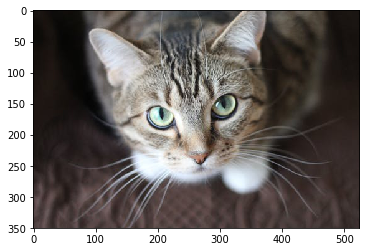

In [10]:
# Importing packages to get input image to be predicted and preprocess it to shape the algorithm expects
import scipy
from PIL import Image
from scipy import ndimage

# Input image to predict
my_image = "cat.jpg"

fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image = my_image/255.
parameters = tf.cast(parameters, tf.float64)
# Calling predict function
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
if np.squeeze(my_image_prediction) > 0.80:
    print("The algorithm predicts cat "+"with probability "+ str(np.squeeze(my_image_prediction)))
else:
    print("The algorithm predicts not cat "+"with probability "+ str(np.squeeze(my_image_prediction)))